In [63]:
import numpy as np
import pandas as pd

# from matplotlib.colors import ListedColormap
from sklearn.metrics import pairwise_distances
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from scipy.spatial.distance import pdist
import time

In [64]:
########## LOADING DATASET ##########
import scipy.io as sio
data = sio.loadmat("../data/mnist_10digits.mat")
xtrain = data["xtrain"]
xtest = data["xtest"]
ytrain = data["ytrain"].reshape(-1,)
ytest = data["ytest"].reshape(-1,)

# down sampling and ntest to save time since constrained by local computer resources
ntest = ytest.shape[0]
ndownsample = 5000

xtrain = xtrain/255;
xtest  = xtest/255;


In [65]:
def logisitc_regression(xtrain,ytrain,xtest,ytest):

    """
    Logistic Regression Model 
    """
    
    # timing 
    time0 = time.time()
    
    # train the model
    clf = LogisticRegression(random_state=0,max_iter=200, solver='liblinear',multi_class='auto').fit(xtrain, ytrain)

    # performance evaluation
    y_pred_lr = clf.predict(xtest)
    acc_lr = sum(y_pred_lr==ytest)/ntest
    
    
    # time to train and test
    time1 = time.time()
    
    # getting confusion matrix
    conf_nn = confusion_matrix(ytest, y_pred_lr)
    
    print("\n")
    print("####### Logistic Regression Results #######\n")
    print('running time: ', round((time1-time0), 2), 'seconds\n')
    print("Confusion Matrix\n")
    print(conf_nn)
    print("\n")
    
    # visual of confusion matrix
    plt.imshow(conf_nn, cmap="hot")
    plt.colorbar()
    plt.title('Logistic Regression') 
    plt.show()
    print("\n")
    
    print("Additional Results\n")
    print(classification_report(ytest,y_pred_lr))
    print("\n")
    print('Accuracy:',acc_lr)
    print("\n")
    
    return round((time1-time0), 2) , acc_lr



####### Logistic Regression Results #######

running time:  81.35 seconds

Confusion Matrix

[[ 960    0    1    2    0    5    6    3    1    2]
 [   0 1112    3    1    0    1    5    1   12    0]
 [   8    8  920   20    9    5   10   11   37    4]
 [   4    0   17  919    2   22    4   12   21    9]
 [   1    2    5    3  914    0   10    2    7   38]
 [  10    2    0   42   10  769   17    7   28    7]
 [   9    3    7    2    6   20  907    1    3    0]
 [   2    7   22    5    8    1    1  950    5   27]
 [  10   14    5   21   14   27    7   11  853   12]
 [   8    8    2   13   31   14    0   24   12  897]]




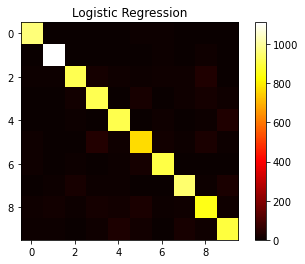



Additional Results

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.89      0.91      0.90      1010
           4       0.92      0.93      0.93       982
           5       0.89      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.88      0.87       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Accuracy: 0.9201




(81.35, 0.9201)

In [66]:
logisitc_regression(xtrain,ytrain,xtest,ytest)

In [67]:
def neural_networks(xtrain,ytrain,xtest,ytest):

    """
    Neural Network
    """
    
    # timing 
    time0 = time.time()
    
    # training model
    mlp = MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=500, random_state=0).fit(xtrain,ytrain)

    # performance evaluation
    y_pred_nn = mlp.predict(xtest)
    acc_nn = sum(y_pred_nn==ytest)/ntest
    
    # time to train and test
    time1 = time.time()
    
    # getting confusion matrix
    conf_nn = confusion_matrix(ytest, y_pred_nn)
    
    print("\n")
    print("####### Neural Network Results #######\n")
    print('running time: ', round((time1-time0), 2), 'seconds\n')
    print("Confusion Matrix\n")
    print(conf_nn)
    print("\n")
    
    # visual of confusion matrix
    plt.imshow(conf_nn, cmap="hot")
    plt.colorbar()
    plt.title('Neural Network') 
    plt.show()
    print("\n")
    
    print("Additional Results\n")
    print(classification_report(ytest,y_pred_nn))
    print("\n")
    
    return round((time1-time0), 2) , acc_nn



####### Neural Network Results #######

running time:  218.73 seconds

Confusion Matrix

[[ 948    0    7    3    1    4   11    1    3    2]
 [   0 1116    4    2    1    0    2    2    6    2]
 [   3   10  965   17    6    0    3   11   13    4]
 [   1    0   18  950    1   21    1   14    2    2]
 [   2    0    4    0  939    2   11    5    4   15]
 [   4    3    1   17    3  837    8    9    6    4]
 [   8    3    3    0    5   11  924    0    3    1]
 [   0   10   15    9    1    4    0  976    3   10]
 [   6    7   10   24    5   21    2    6  888    5]
 [   6    8    3    6   21    3    1   15   10  936]]




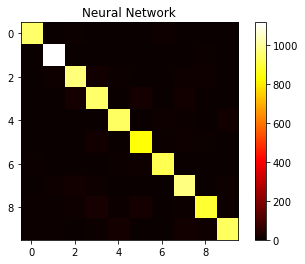



Additional Results

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.94      0.94      1032
           3       0.92      0.94      0.93      1010
           4       0.96      0.96      0.96       982
           5       0.93      0.94      0.93       892
           6       0.96      0.96      0.96       958
           7       0.94      0.95      0.94      1028
           8       0.95      0.91      0.93       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000





(218.73, 0.9479)

In [68]:
neural_networks(xtrain,ytrain,xtest,ytest)

In [69]:
def knn(xtrain,ytrain,xtest,ytest):
    
    """
    KNN model
    """
    
    # timing 
    time0 = time.time()

    
    # training model
    clf = KNeighborsClassifier(n_neighbors = 3).fit(xtrain[0:ndownsample], ytrain[0:ndownsample])

    # performance evaluation
    y_pred_knn = clf.predict(xtest)
    acc_knn = sum(y_pred_knn==ytest)/ntest

    # time to train and test
    time1 = time.time()
    
    
    # getting confusion matrix
    conf_knn = confusion_matrix(ytest, y_pred_knn)
    
    print("\n")
    print("####### KNN Results #######\n")
    print('running time: ', round((time1-time0), 2), 'seconds\n')
    print("Confusion Matrix\n")
    print(conf_knn)
    print("\n")
    
    # visual of confusion matrix
    plt.imshow(conf_knn, cmap="hot")
    plt.colorbar()
    plt.title('KNN') 
    plt.show()
    print("\n")
    
    print("Additional Results\n")
    print(classification_report(ytest,y_pred_knn))
    print("\n")
    
    return round((time1-time0), 2) , acc_knn



####### KNN Results #######

running time:  48.51 seconds

Confusion Matrix

[[ 970    1    1    0    0    1    5    1    1    0]
 [   0 1130    0    2    0    0    3    0    0    0]
 [  18   32  941    6    2    0    6   21    6    0]
 [   4    9    9  927    1   27    1   10   16    6]
 [   1   23    2    0  906    0    9    1    0   40]
 [   7    5    1   29    7  816   13    1    6    7]
 [  13    7    0    0    4    4  930    0    0    0]
 [   1   41    6    2    8    1    0  945    0   24]
 [  21    8   16   22   10   21    4   10  839   23]
 [   6    9    3    9   23    4    1   16    3  935]]




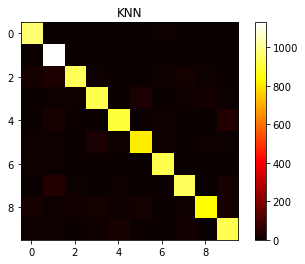



Additional Results

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       0.89      1.00      0.94      1135
           2       0.96      0.91      0.94      1032
           3       0.93      0.92      0.92      1010
           4       0.94      0.92      0.93       982
           5       0.93      0.91      0.92       892
           6       0.96      0.97      0.96       958
           7       0.94      0.92      0.93      1028
           8       0.96      0.86      0.91       974
           9       0.90      0.93      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000





(48.51, 0.9339)

In [70]:
knn(xtrain,ytrain,xtest,ytest)

#    SVM  

In [71]:
def kernel_svm(xtrain,ytrain,xtest,ytest):
    
    """
    Kernel SVM model
    """
    
    # timing 
    time0 = time.time()

    
    # getting pair_wise_distance for kernel 
    first = pdist(xtrain[0:ndownsample], 'sqeuclidean')
    median = np.median(first)
    sigma = (median/2)**(1/2)
  
    # training model
    sv = SVC(kernel='rbf', random_state=1,gamma = 'scale', C=sigma).fit(xtrain[0:ndownsample],ytrain[0:ndownsample])

    # performance evaluation
    y_pred_sv_ker = sv.predict(xtest)
    acc_sv_ker = sum(y_pred_sv_ker==ytest)/ntest

    # time to train and test
    time1 = time.time()
    
    
    # getting confusion matrix
    conf_sv_ker = confusion_matrix(ytest, y_pred_sv_ker)
    
    print("\n")
    print("####### Kernel SVM Results #######\n")
    print('running time: ', round((time1-time0), 2), 'seconds\n')
    print("Confusion Matrix\n")
    print(conf_sv_ker)
    print("\n")
    
    # visual of confusion matrix
    plt.imshow(conf_sv_ker, cmap="hot")
    plt.colorbar()
    plt.title('Kernel SVM') 
    plt.show()
    print("\n")
    
    print("Additional Results\n")
    print(classification_report(ytest,y_pred_sv_ker))
    print("\n")
    
    return round((time1-time0), 2) , acc_sv_ker



####### Kernel SVM Results #######

running time:  30.81 seconds

Confusion Matrix

[[ 969    0    2    0    1    2    2    1    3    0]
 [   0 1122    4    1    0    1    3    1    3    0]
 [   8    4  982   10    5    0    7    9    6    1]
 [   1    0   11  960    1   12    1    9    8    7]
 [   1    0    3    0  952    0    6    3    0   17]
 [   6    2    2    9    7  846   10    1    6    3]
 [   7    3    2    0    7    6  930    0    3    0]
 [   0   17   17    4    9    0    1  958    0   22]
 [   6    1    3   13    8   13    2    5  913   10]
 [   4    7    2    9   28    4    0    8   10  937]]




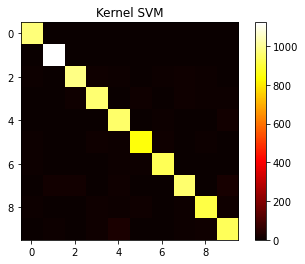



Additional Results

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.96      0.95      0.95      1032
           3       0.95      0.95      0.95      1010
           4       0.94      0.97      0.95       982
           5       0.96      0.95      0.95       892
           6       0.97      0.97      0.97       958
           7       0.96      0.93      0.95      1028
           8       0.96      0.94      0.95       974
           9       0.94      0.93      0.93      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000





(30.81, 0.9569)

In [72]:
kernel_svm(xtrain,ytrain,xtest,ytest)

In [73]:
def linear_svm(xtrain,ytrain,xtest,ytest):
    
    """
    Linear SVM model
    """
    
    # timing 
    time0 = time.time()
  
    # training model
    sv = SVC(kernel='linear', random_state=0).fit(xtrain[0:ndownsample],ytrain[0:ndownsample])
    
    # performance evaluation
    y_pred_sv = sv.predict(xtest)
    acc_sv = sum(y_pred_sv==ytest)/ntest

    # time to train and test
    time1 = time.time()
    
    
    # getting confusion matrix
    conf_sv = confusion_matrix(ytest, y_pred_sv)
    
    print("\n")
    print("####### Linear SVM Results #######\n")
    print('running time: ', round((time1-time0), 2), 'seconds\n')
    print("Confusion Matrix\n")
    print(y_pred_sv)
    print("\n")
    
    # visual of confusion matrix
    plt.imshow(conf_sv, cmap="hot")
    plt.colorbar()
    plt.title('Linear SVM') 
    plt.show()
    print("\n")
    
    print("Additional Results\n")
    print(classification_report(ytest,y_pred_sv))
    print("\n")
    
    return round((time1-time0), 2) , acc_sv



####### Linear SVM Results #######

running time:  14.24 seconds

Confusion Matrix

[7 2 1 ... 4 5 6]




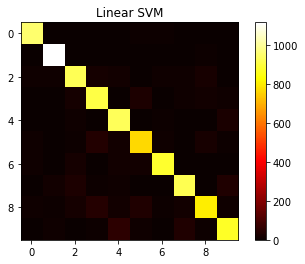



Additional Results

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.89      0.90      0.89      1032
           3       0.88      0.90      0.89      1010
           4       0.87      0.95      0.91       982
           5       0.88      0.87      0.87       892
           6       0.95      0.92      0.94       958
           7       0.92      0.90      0.91      1028
           8       0.90      0.83      0.86       974
           9       0.90      0.87      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000





(14.24, 0.9101)

In [74]:
linear_svm(xtrain,ytrain,xtest,ytest)



####### Logistic Regression Results #######

running time:  68.53 seconds

Confusion Matrix

[[ 960    0    1    2    0    5    6    3    1    2]
 [   0 1112    3    1    0    1    5    1   12    0]
 [   8    8  920   20    9    5   10   11   37    4]
 [   4    0   17  919    2   22    4   12   21    9]
 [   1    2    5    3  914    0   10    2    7   38]
 [  10    2    0   42   10  769   17    7   28    7]
 [   9    3    7    2    6   20  907    1    3    0]
 [   2    7   22    5    8    1    1  950    5   27]
 [  10   14    5   21   14   27    7   11  853   12]
 [   8    8    2   13   31   14    0   24   12  897]]




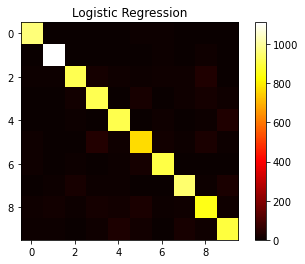



Additional Results

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.89      0.91      0.90      1010
           4       0.92      0.93      0.93       982
           5       0.89      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.88      0.87       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Accuracy: 0.9201




####### Neural Network Results #######

running time:  200.01 seconds

Confusion Matrix

[[ 948    0    7    3    1    4   11    1    3    2]
 [   0 1116    4    2    1    0    2    2    6    2]
 

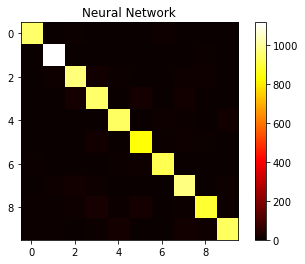



Additional Results

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.94      0.94      1032
           3       0.92      0.94      0.93      1010
           4       0.96      0.96      0.96       982
           5       0.93      0.94      0.93       892
           6       0.96      0.96      0.96       958
           7       0.94      0.95      0.94      1028
           8       0.95      0.91      0.93       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000





####### KNN Results #######

running time:  48.0 seconds

Confusion Matrix

[[ 970    1    1    0    0    1    5    1    1    0]
 [   0 1130    0    2    0    0    3    0    0    0]
 [  18   32  941    6    2    0  

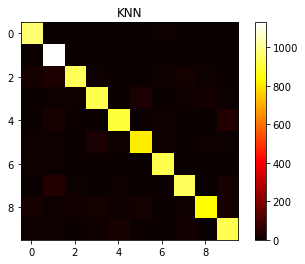



Additional Results

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       0.89      1.00      0.94      1135
           2       0.96      0.91      0.94      1032
           3       0.93      0.92      0.92      1010
           4       0.94      0.92      0.93       982
           5       0.93      0.91      0.92       892
           6       0.96      0.97      0.96       958
           7       0.94      0.92      0.93      1028
           8       0.96      0.86      0.91       974
           9       0.90      0.93      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000





####### Kernel SVM Results #######

running time:  30.71 seconds

Confusion Matrix

[[ 969    0    2    0    1    2    2    1    3    0]
 [   0 1122    4    1    0    1    3    1    3    0]
 [   8    4  982   10    

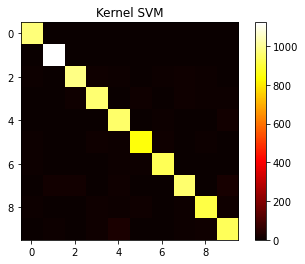



Additional Results

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.96      0.95      0.95      1032
           3       0.95      0.95      0.95      1010
           4       0.94      0.97      0.95       982
           5       0.96      0.95      0.95       892
           6       0.97      0.97      0.97       958
           7       0.96      0.93      0.95      1028
           8       0.96      0.94      0.95       974
           9       0.94      0.93      0.93      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000





####### Linear SVM Results #######

running time:  14.3 seconds

Confusion Matrix

[7 2 1 ... 4 5 6]




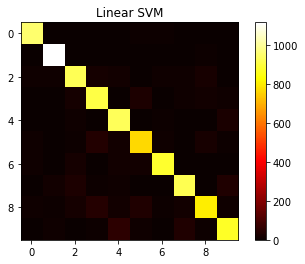



Additional Results

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.89      0.90      0.89      1032
           3       0.88      0.90      0.89      1010
           4       0.87      0.95      0.91       982
           5       0.88      0.87      0.87       892
           6       0.95      0.92      0.94       958
           7       0.92      0.90      0.91      1028
           8       0.90      0.83      0.86       974
           9       0.90      0.87      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000





In [75]:
if __name__ == "__main__":
    
    # run all together
    time_lr, acc_lr = logisitc_regression(xtrain,ytrain,xtest,ytest)
    time_nn, acc_nn = neural_networks(xtrain,ytrain,xtest,ytest)
    time_knn, acc_knn = knn(xtrain,ytrain,xtest,ytest)
    time_sv_ker, acc_sv_ker = kernel_svm(xtrain,ytrain,xtest,ytest)
    time_sv, acc_sv = linear_svm(xtrain,ytrain,xtest,ytest)


# Analysis
As you can see from the table and graphs below, all models performed relativelmy similarly when it comes to accuracy (worst is .92 and best is .96); however, there is a rather large differnce when it comes to speed.  Although the neural network model performs second best in terms of accuracy, it is more than 10x slower than the fastest model (linear SVM) which performs only 3% worse. When it comes to the real world, there is a trade off between accuracy and time (resources) that are available. This largely is contingent upon which error (Type I or Type II) is weighted as "worse" for the model, and how many resources you have available. 

,Time,Accuracy
Linear Regression,68.53,0.9201
Neural Network,200.01,0.9479
KNN,48.00,0.9339
Kernel SVM,30.71,0.9569
Linear SVM,14.30,0.9101


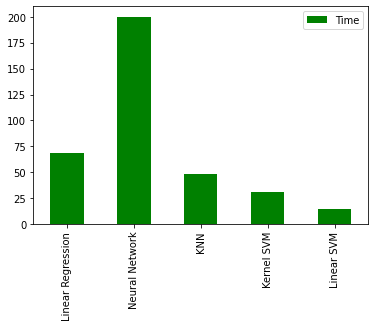

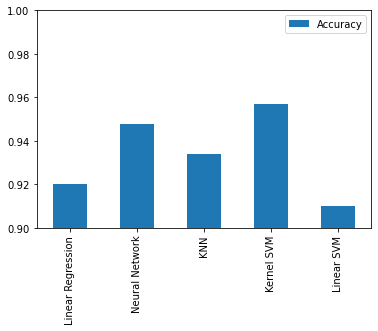

In [76]:
times = [time_lr,time_nn,time_knn,time_sv_ker,time_sv]
results = [acc_lr,acc_nn,acc_knn,acc_sv_ker,acc_sv]
models = ['Linear Regression','Neural Network','KNN','Kernel SVM','Linear SVM']
df = pd.DataFrame(list(zip(models, times, results)),columns =['Models','Time', 'Accuracy'])

df.index = list(df["Models"])
df = df.drop(columns=['Models'])


df[['Time']].plot.bar(color = "green")
df[['Accuracy']].plot.bar(ylim = (.90,1))

df